# Data Processing
Data Sets: EYEPacs and Messidor

1.   EyePacs obtained from: https://www.kaggle.com/datasets/mariaherrerot/
2.   Messidor obtained from: https://www.adcis.net/en/third-party/messidor/
3.   IDRiD dataset obtained from: https://ieee-dataport.org/open-access/indian-diabetic-retinopathy-image-dataset-idrid]

Class 1-4 images combined from Messidor and IDRiD and processed for resolution 1024 x 1024.


In [ ]:
!pip install torch
!pip install pillow
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
import torchvision.models
import PIL.Image as Image #For working with image files.
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import os
import shutil
import sys

In [ ]:
!pip install google

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade google-api-python-client

In [ ]:
# Linking Google Drive for Data
!pip install google-colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzipping data
####### Run if needed i.e data not on colab #############3
!unzip "/content/drive/MyDrive/eyepacs.zip"

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
import torchvision.models
import PIL.Image as Image #For working with image files.
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
import os
import shutil
import sys

In [ ]:
image_path = "/content/eyepacs_preprocess/eyepacs_preprocess"
label_path = "/content/trainLabels.csv"

df = pd.read_csv(
    label_path,
    index_col=False)

# Number of Images

print("There are %d images in the dataset"%len(df))

# Displaying an image from our data set #
# Code taken from: https://www.kaggle.com/code/balajiai/diabetic-retinopathy-detection-using-pytorch/notebook
# and refactored for the block below

num = 0  #Select the first image to display
sample_image = (f'{image_path}/{df["image"][num]}.jpeg')#Image file.
sample_image = Image.open(sample_image)
plt.imshow(sample_image)
plt.axis('off')
plt.title(f'Class: {df["level"][num]}') #Class of the image.
plt.show()


In [ ]:
!mkdir /content/eyepacs_preprocess/DR

In [ ]:
# Inputting Images in their respective folders by classes 0-4 #
# Code taken from https://github.com/bhanuprathap2000/dsp/blob/master/datasplit.py and refactored below #

labels = df

image_dir = image_path
!mkdir
DR = "/content/eyepacs_preprocess/DR"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, class_name in df.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = image_dir + '/'+ filename + '.jpeg'
    dst_path = DR + str(class_name) + '/' + filename + '.jpeg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

In [ ]:
# Checking if each of the needed folder has the correct image number #
DR0 = len(os.listdir('/content/eyepacs_preprocess/DR0'))
DR1 = len(os.listdir('/content/eyepacs_preprocess/DR1'))
DR2 = len(os.listdir('/content/eyepacs_preprocess/DR2'))
DR3 = len(os.listdir('/content/eyepacs_preprocess/DR3'))
DR4 = len(os.listdir('/content/eyepacs_preprocess/DR4'))


total = DR0+DR1+DR2+DR3+DR4

if (total == df.shape[0]) and (np.sum(df["level"] == 0) == DR0) and (np.sum(df["level"] == 1) == DR1) and (np.sum(df["level"] == 2) == DR2) and (np.sum(df["level"] == 3) == DR3) and (np.sum(df["level"] == 4) == DR4):    #Matching split with number of records in CSV file#
  print("DR0: %d Images\nDR1 :%d Images\nDR2 :%d Images\nDR3 :%d Images\nDR4 :%d Images\n"%(DR0,DR1,DR2,DR3,DR4))
  print("Total: %d Images"%(total))
  print("Images are split correctly")
  print(len(df["level"]))





DR0: 25802 Images
DR1 :2438 Images
DR2 :5288 Images
DR3 :872 Images
DR4 :708 Images

Total: 35108 Images
Images are split correctly
35108


In [ ]:
# In the the eyepacs_preprocess there exists DR and eyepacs_preprocess which are not needed #
# We will simply move DR0....DR4 to a new directory#

!mkdir /content/EyePACS_Dataset

destination = '/content/EyePACS_Dataset'
shutil.move('/content/eyepacs_preprocess/DR0', destination)
shutil.move('/content/eyepacs_preprocess/DR1', destination)
shutil.move('/content/eyepacs_preprocess/DR2', destination)
shutil.move('/content/eyepacs_preprocess/DR3', destination)
shutil.move('/content/eyepacs_preprocess/DR4', destination)


'/content/EyePACS_Dataset/DR4'

In [ ]:
# Given some images were not of 1024 by 1024, we will pad them #
# First Tried on Dummy Folder to make sure it works #
# Images which need to be padded are padded by the appropriate amount #
# 1024X1024 images remain the same #

def pad(path):
  dirs = os.listdir(path)
  for item in dirs:
      print(path+'/'+item)
      if os.path.isfile(path+'/'+item):
            im = Image.open(path+'/'+item)
            width, height = im.size
            updated_w = width + (1024-width)
            updated_h = height + (1024-height)
            f, e = os.path.splitext(path+'/'+item)
            os.remove(path+'/'+item) #Delete the old image
            imPadded = Image.new(im.mode, (updated_w, updated_h))
            imPadded.paste(im)
            imPadded.save(f+'.jpeg', 'JPEG')

#path = "/content/dummy_folder"
#pad(path) # dummy folder all images in this should be 1024x1024

# Calling pad forfolder for DR0, DR1, DR2, DR3, DR4
pad('/content/EyePACS_Dataset/DR0')
pad('/content/EyePACS_Dataset/DR1')
pad('/content/EyePACS_Dataset/DR2')
pad('/content/EyePACS_Dataset/DR3')
pad('/content/EyePACS_Dataset/DR4')



Streaming output truncated to the last 5000 lines.
/content/EyePACS_Dataset/DR2/20020_left.jpeg
/content/EyePACS_Dataset/DR2/32558_left.jpeg
/content/EyePACS_Dataset/DR2/41269_left.jpeg
/content/EyePACS_Dataset/DR2/30779_right.jpeg
/content/EyePACS_Dataset/DR2/34101_right.jpeg
/content/EyePACS_Dataset/DR2/685_right.jpeg
/content/EyePACS_Dataset/DR2/40058_left.jpeg
/content/EyePACS_Dataset/DR2/16777_right.jpeg
/content/EyePACS_Dataset/DR2/25058_left.jpeg
/content/EyePACS_Dataset/DR2/31048_left.jpeg
/content/EyePACS_Dataset/DR2/3276_right.jpeg
/content/EyePACS_Dataset/DR2/43025_left.jpeg
/content/EyePACS_Dataset/DR2/3220_right.jpeg
/content/EyePACS_Dataset/DR2/17660_right.jpeg
/content/EyePACS_Dataset/DR2/43526_left.jpeg
/content/EyePACS_Dataset/DR2/18163_right.jpeg
/content/EyePACS_Dataset/DR2/42207_right.jpeg
/content/EyePACS_Dataset/DR2/5209_left.jpeg
/content/EyePACS_Dataset/DR2/34084_right.jpeg
/content/EyePACS_Dataset/DR2/4043_right.jpeg
/content/EyePACS_Dataset/DR2/39992_right.jpe

In [ ]:
# Copying Padded data to drive #
######## DONT RUN THIS Padded dataset is on the drive for Team 18 ###########
os.listdir('/content/drive/MyDrive/EyePACS_Dataset_Padded/')
print(len(os.listdir('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR0')))
print(len(os.listdir('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR1')))
print(len(os.listdir('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR3')))
print(len(os.listdir('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR4')))

In [ ]:
# Setting up directories for mini dataset #
# DONT EXECUTE
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini'

In [ ]:
# DONT EXECUTE
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR0'
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR1'
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR2'
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR3'
!mkdir '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR4'

In [ ]:
def mini_dataset(srcPath,destPath):
  srcFiles = os.listdir(srcPath)
  i = 0;
  for fileName in srcFiles:
      imgPath = os.path.join(srcPath, fileName)
      if os.path.isfile(imgPath):
          shutil.move(imgPath, destPath)
          i = i + 1
      if i == 700 :
          return



In [ ]:
# DONT EXECUTE
mini_dataset('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR0','/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR0')


In [ ]:
#DONT EXECUTE
mini_dataset('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR1','/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR1')
mini_dataset('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR2','/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR2')
mini_dataset('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR3','/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR3')
mini_dataset('/content/drive/MyDrive/EyePACS_Dataset_Padded/DR4','/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR4')

In [ ]:
#DONT EXECUTE - Combining classes 1-4
shutil.move('/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR1', '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR4')
shutil.move('/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR2', '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR4')
shutil.move('/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR3', '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini/DR4')

In [ ]:
# We will now define the transformation we want to apply on our data set #
# Images are 3x1024x1024 #
import torchvision.transforms as transforms
transform = transforms.Compose(
     [transforms.RandomVerticalFlip(0.2),
      transforms.ColorJitter(contrast = 0.4, saturation = 0.1, hue = 0.1),
      transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Using the padded data set from Team 18 Drive #
dset_path = '/content/drive/MyDrive/EyePACS_Dataset_Padded_Mini'
dataset = torchvision.datasets.ImageFolder(dset_path,transform)

In [ ]:
# Displaying how many images per class #

targets_tensor = torch.FloatTensor(dataset.targets)
classes_numbers = torch.unique(targets_tensor,return_counts= True)
print("Class Breakdown: \nDR0 = %d \nDR1 = %d\nDR2 = %d\nDR3 = %d\nDR4 = %d\nTotal number of imgs = %d"%(classes_numbers[1][0],classes_numbers[1][1],classes_numbers[1][2],classes_numbers[1][3],classes_numbers[1][4],len(dataset)))





In [ ]:
# Displaying sample images from dataset #
k = 0
for images, labels in dataset:
    image = images[0]
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(labels)
    k += 1
    if k > 14:
        break

In [ ]:
# Breaking Data set into test and validation (80 - 20 percent ratio) #

small_train, small_val, small_test, train_data, validation_data, test_data = torch.utils.data.random_split(dataset, [0, 0, 0, 1000, 200, 200])

# Primary Model

*   CNN
*   Transfer learning



In [ ]:
batch_size = 64

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
import torchvision.models

# alexnet
import torchvision.models

torch.manual_seed(1) # set the random seed

# obtain one batch of training images
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

# confirm output from AlexNet feature extraction
alexNet = torchvision.models.alexnet(pretrained=True)
features = alexNet.features(images)
features.shape

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([64, 256, 31, 31])

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.name = "CNN"
        self.conv1 = nn.Conv2d(256, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 256, 5)
        self.fc1 = nn.Linear(256*4*4, 32)
        self.fc2 = nn.Linear(32, 2)
        self.dropout1 = nn.Dropout(0.4) # drop out layer with 20% dropped out neuron

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 256*4*4)
        x = F.relu(self.fc1(self.dropout1(x)))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
def get_accuracy(model, dataUsed):
    data_loader = torch.utils.data.DataLoader(dataUsed, batch_size=batch_size, shuffle=True)

    correct = 0
    total = 0
    for imgs, labels in data_loader:


        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################

        output = model(ALNC(imgs))
        #output = model(imgs)

        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
def train(model, trainData, valData, batch_size=20, num_epochs=1):
    learning_rate = 0.01

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)
    train_loader = torch.utils.data.DataLoader(trainData, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(valData, batch_size=batch_size, shuffle=True)
    iters, epoch_iter, losses, train_acc, val_acc = [], [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch:", epoch)
        mini_b=0
        mini_batch_correct = 0
        Mini_batch_total = 0
        for imgs, labels in iter(train_loader):


            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################

          #### ALNC is alexNet.features (AlexNet without classifier) ####

            out = model(ALNC(imgs))             # forward pass
            #out = model(imgs)
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch



            ##### Mini_batch Accuracy ##### We don't compute accuracy on the whole training set in every iteration!
            # pred = out.max(1, keepdim=True)[1]
            # mini_batch_correct = pred.eq(labels.view_as(pred)).sum().item()
            # Mini_batch_total = imgs.shape[0]
            # train_acc.append((mini_batch_correct / Mini_batch_total))
           ###########################

          # save the current training information
            iters.append(n)
            # losses.append(float(loss)/batch_size)             # compute *average* loss
            n += 1
            # mini_b += 1
            #print("Iteration: ",n,'Progress: % 6.2f ' % ((epoch * len(train_loader) + mini_b) / (num_epochs * len(train_loader))*100),'%')
            losses.append(float(loss)/batch_size)             # compute *average* loss
            print(float(loss)/batch_size)
            print("Batch", n)
        train_acc.append(get_accuracy(model, trainData)) # compute training accuracy
        val_acc.append(get_accuracy(model, valData))  # compute validation accuracy

        print(("Epoch {}: Train accuracy: {} |"+
               "Validation accuracy: {} ").format(
                   epoch,
                   train_acc[epoch],
                   val_acc[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

        epoch_iter.append(epoch)
        print("\n")


    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    plt.title("Training Curve")
    plt.plot(epoch_iter, train_acc, label="Training")
    plt.plot(epoch_iter, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Validation Accuracy")
    plt.legend(loc='best')
    plt.show()

    train_acc.append(get_accuracy(model, trainData))
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

CUDA is available!  Training on GPU ...
Epoch: 0
0.010663792490959167
Batch 1
0.010995649732649326
Batch 2
0.010996400378644466
Batch 3
0.010765797458589077
Batch 4
0.01095258817076683
Batch 5
0.010746949352324009
Batch 6
0.010868673212826252
Batch 7
0.01085062325000763
Batch 8
0.010822353884577751
Batch 9
0.010844401083886623
Batch 10
0.010809734463691711
Batch 11
0.01080398540943861
Batch 12
0.010824658907949924
Batch 13
0.01099801529198885
Batch 14
0.010789485648274422
Batch 15
0.010845860466361046
Batch 16
Epoch 0: Train accuracy: 0.504 |Validation accuracy: 0.535 


Epoch: 1
0.010923372581601143
Batch 17
0.010764257982373238
Batch 18
0.010792386718094349
Batch 19
0.010797824710607529
Batch 20
0.010793660767376423
Batch 21
0.010795772075653076
Batch 22
0.010874669067561626
Batch 23
0.010833488777279854
Batch 24
0.010685822926461697
Batch 25
0.010678699240088463
Batch 26
0.01066768728196621
Batch 27
0.010721954517066479
Batch 28
0.010795787908136845
Batch 29
0.010536341927945614
Bat

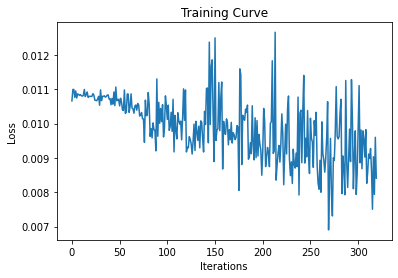

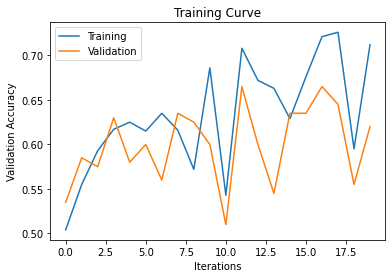

Final Training Accuracy: 0.734
Final Validation Accuracy: 0.62


In [ ]:
use_cuda = True

model = CNN()
ALNC = alexNet.features

if use_cuda and torch.cuda.is_available():
  ALNC.cuda()
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#proper model
train(model, train_data, validation_data, batch_size=batch_size, num_epochs=20)

**Testing Data**

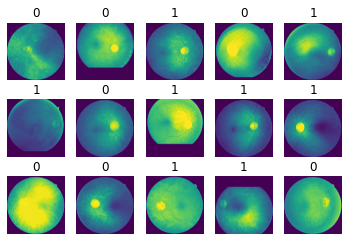

In [ ]:
# Displaying sample images from dataset #
k = 0
for images, labels in test_data:
    image = images[0]
    plt.subplot(3, 5, k+1)
    plt.axis('off')
    plt.imshow(image)
    plt.title(labels)
    k += 1
    if k > 14:
        break

In [ ]:
print("Accuracy on new (never seen) data", get_accuracy(model, test_data))

Accuracy on new (never seen) data 0.65


Index 7


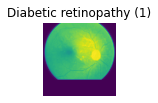

In [ ]:
import random
randomIndex = random.randint(1,62)
print("Index", randomIndex)
# Displaying sample images from dataset #
k = 0
for images, labels in test_data:
    k += 1
    if k > randomIndex:
      imageTest = images
      imageNew = images[0]
      plt.subplot(2, 4, 1)
      plt.axis('off')
      plt.imshow(imageNew)
      if(labels == 0):
        plt.title("No diabetic retinopathy (0)")
      else:
        plt.title("Diabetic retinopathy (1)")
      break

In [ ]:
output = model(ALNC(imageTest.cuda()))
pred = output.max(1, keepdim=True)[1]
print("Model predicts", pred[0][0])

Model predicts tensor(1, device='cuda:0')


Index 34


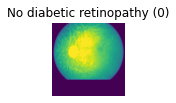

In [ ]:
import random
randomIndex = random.randint(1,62)
print("Index", randomIndex)
# Displaying sample images from dataset #
k = 0
for images, labels in test_data:
    k += 1
    if k > randomIndex:
      imageTest = images
      imageNew = images[0]
      plt.subplot(2, 4, 1)
      plt.axis('off')
      plt.imshow(imageNew)
      if(labels == 0):
        plt.title("No diabetic retinopathy (0)")
      else:
        plt.title("Diabetic retinopathy (1)")
      break

In [ ]:
output = model(ALNC(imageTest.cuda()))
pred = output.max(1, keepdim=True)[1]
print("Model predicts", pred[0][0])

Model predicts tensor(0, device='cuda:0')


# Baseline Model

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import DetCurveDisplay

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for images, labels in small_train:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train)+len(small_val)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)
for images, labels in small_test:
    images_for_test.append(images)
    y_true_for_test.append(labels)
images_for_test = torch.stack(images_for_test);
images_for_test = np.array(images_for_test).reshape((len(small_test)),-1);
y_true_for_test = np.array(y_true_for_test);

(120, 3145728)
(120,)


0.6


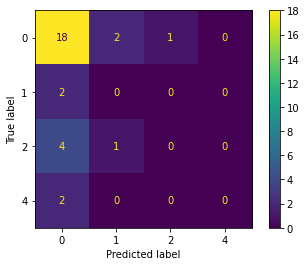

In [ ]:
clf = svm.SVC(kernel = "linear")
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)
y_pred_for_test = clf.predict(images_for_test)
print(accuracy_score(y_true_for_test, y_pred_for_test))
ConfusionMatrixDisplay.from_predictions(y_true_for_test, y_pred_for_test)

In [ ]:
for images, labels in small_train:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train)+len(small_val)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)
for images, labels in small_test:
    images_for_test.append(images)
    y_true_for_test.append(labels)
images_for_test = torch.stack(images_for_test);
images_for_test = np.array(images_for_test).reshape((len(small_test)),-1);
y_true_for_test = np.array(y_true_for_test);

(120, 3145728)
(120,)


0.6


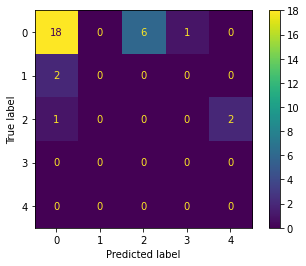

In [ ]:
clf = svm.SVC(kernel = "linear")
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)
y_pred_for_test = clf.predict(images_for_test)
print(accuracy_score(y_true_for_test, y_pred_for_test))
ConfusionMatrixDisplay.from_predictions(y_true_for_test, y_pred_for_test)

In [ ]:
#small_train_2, small_val_2, small_test_2, train_data_2, validation_data_2, test_data_2 = torch.utils.data.random_split(dataset, [500, 100, 100, 500, 100, 100])
small_train_1, small_val_1, remaining_data = torch.utils.data.random_split(dataset, [100,25,1275])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_1:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_1:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_1)+len(small_val_1)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf = svm.SVC(kernel = "linear")
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_2, small_val_2, remaining_data_2 = torch.utils.data.random_split(remaining_data, [100,25,1150])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_2:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_2:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_2)+len(small_val_2)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_3, small_val_3, remaining_data_3 = torch.utils.data.random_split(remaining_data_2, [100,25,1025])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_3:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_3:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_3)+len(small_val_3)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_4, small_val_4, remaining_data_4 = torch.utils.data.random_split(remaining_data_3, [100,25,900])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_4:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_4:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_4)+len(small_val_4)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_5, small_val_5, remaining_data_5 = torch.utils.data.random_split(remaining_data_4, [100,25,775])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_5:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_5:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_5)+len(small_val_5)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_6, small_val_6, remaining_data_6 = torch.utils.data.random_split(remaining_data_5, [100,25,650])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_6:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_6:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_6)+len(small_val_6)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_7, small_val_7, remaining_data_7 = torch.utils.data.random_split(remaining_data_6, [100,25,525])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_7:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_7:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_7)+len(small_val_7)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_8, small_val_8, remaining_data_8 = torch.utils.data.random_split(remaining_data_7, [100,25,400])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_8:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_8:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_8)+len(small_val_8)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_9, small_val_9, remaining_data_9 = torch.utils.data.random_split(remaining_data_8, [100,25,275])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_9:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_9:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_9)+len(small_val_9)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_10, small_val_10, remaining_data_10 = torch.utils.data.random_split(remaining_data_9, [100,25,150])

In [ ]:
images_for_training_and_validation = []
images_for_test = []
y_true_for_training_and_validation = []
y_true_for_test = []
y_pred_for_test = []
training_data_with_labels = []

In [ ]:
for images, labels in small_train_10:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
for images, labels in small_val_10:
    images_for_training_and_validation.append(images)
    y_true_for_training_and_validation.append(labels)
images_for_training_and_validation = torch.stack(images_for_training_and_validation);
images_for_training_and_validation = np.array(images_for_training_and_validation).reshape((len(small_train_10)+len(small_val_10)),-1);
y_true_for_training_and_validation = np.array(y_true_for_training_and_validation);
print(images_for_training_and_validation.shape)
print(y_true_for_training_and_validation.shape)

(125, 3145728)
(125,)


In [ ]:
clf.fit(images_for_training_and_validation, y_true_for_training_and_validation)

SVC(kernel='linear')

In [ ]:
small_train_11, test_data = torch.utils.data.random_split(remaining_data_10, [50, 100])

In [ ]:
for images, labels in test_data:
    images_for_test.append(images)
    y_true_for_test.append(labels)
images_for_test = torch.stack(images_for_test);
images_for_test = np.array(images_for_test).reshape((len(test_data)),-1);
y_true_for_test = np.array(y_true_for_test);

In [ ]:
images_for_training_and_validation = []
y_true_for_training_and_validation = []
training_data_with_labels = []

0.56


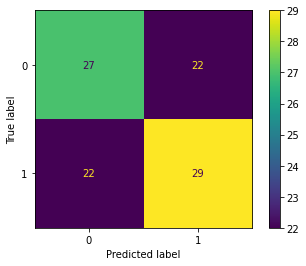

In [ ]:
y_pred_for_test = clf.predict(images_for_test)
print(accuracy_score(y_true_for_test, y_pred_for_test))
ConfusionMatrixDisplay.from_predictions(y_true_for_test, y_pred_for_test)